## Make a subset of a data cube

This notebook shows how to view the metadata of an xcube dataset and how to make a subset xcube dataset for a particular region of interest. 

---

Importing necessary libraries and functions:

In [1]:
import shapely
import xarray as xr
from xcube.api import clip_dataset_by_geometry, read_cube

Load an xcube dataset containing Sea Surface Temperature data for the Southern North Sea from bucket:

In [2]:
cube = read_cube('http://obs.eu-de.otc.t-systems.com/dcs4cop-obs-01/dcs4cop-bc-sst-sns-l2c-v1-2017-optimized.zarr')

View the metadata of the cube:

In [3]:
cube

<xarray.Dataset>
Dimensions:       (bnds: 2, lat: 5632, lon: 10240, time: 365)
Coordinates:
  * lat           (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds      (lat, bnds) float64 dask.array<shape=(5632, 2), chunksize=(5632, 2)>
  * lon           (lon) float64 -16.0 -16.0 -15.99 -15.99 ... 10.66 10.66 10.67
    lon_bnds      (lon, bnds) float64 dask.array<shape=(10240, 2), chunksize=(10240, 2)>
  * time          (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-31T12:00:00
    time_bnds     (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(365, 2)>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float64 dask.array<shape=(365, 5632, 10240), chunksize=(1, 704, 640)>
Attributes:
    acknowledgment:             Data Cube produced based on data provided by ...
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-co

Print out the time stamps avaialbe in the cube:

In [4]:
# cube.time.values

Print out the number of time stamps:

In [5]:
cube.time.shape

(365,)

View the metadata of a cubes variable:

In [6]:
cube.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 365, lat: 5632, lon: 10240)>
dask.array<shape=(365, 5632, 10240), dtype=float64, chunksize=(1, 704, 640)>
Coordinates:
  * lat      (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.01 48.0 48.0
  * lon      (lon) float64 -16.0 -16.0 -15.99 -15.99 ... 10.66 10.66 10.66 10.67
  * time     (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-31T12:00:00
Attributes:
    comment:              
    long_name:           analysed sea surface temperature
    source:              UKMO-L4HRfnd-GLOB-OSTIA
    spatial_resampling:  Nearest
    standard_name:       sea_surface_foundation_temperature
    type:                foundation
    units:               kelvin
    valid_max:           4500
    valid_min:           -300

View the shape and the chunking of a data cubes variable:

In [7]:
cube.analysed_sst.data

dask.array<zarr, shape=(365, 5632, 10240), dtype=float64, chunksize=(1, 704, 640)>

Plot a cubes variable for a specific time stamp:

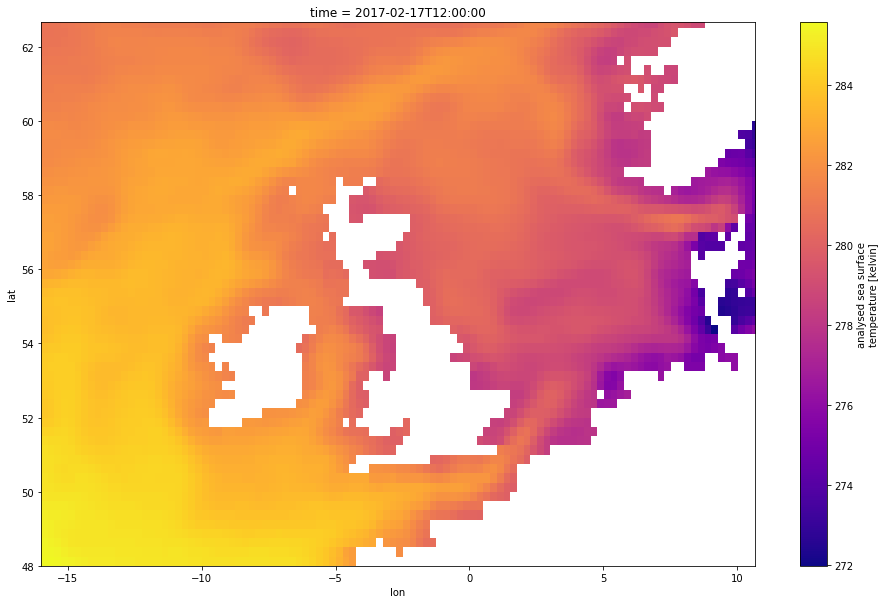

In [14]:
cube.analysed_sst.isel(time=47).plot.imshow(figsize=(16,10), cmap='plasma')

Define an area to make a subset of a cube:

In [9]:
x1 = 0.0  # degree
y1 = 50.0  # degree
x2 = 5.0  # degree
y2 = 52.0  # degree

bbox = x1, y1, x2, y2

Convert bounding box into a shapely object:

In [10]:
bbox = shapely.geometry.box(*bbox)

Clip cube by using the bounding box:

In [11]:
subset_cube = clip_dataset_by_geometry(cube, bbox)

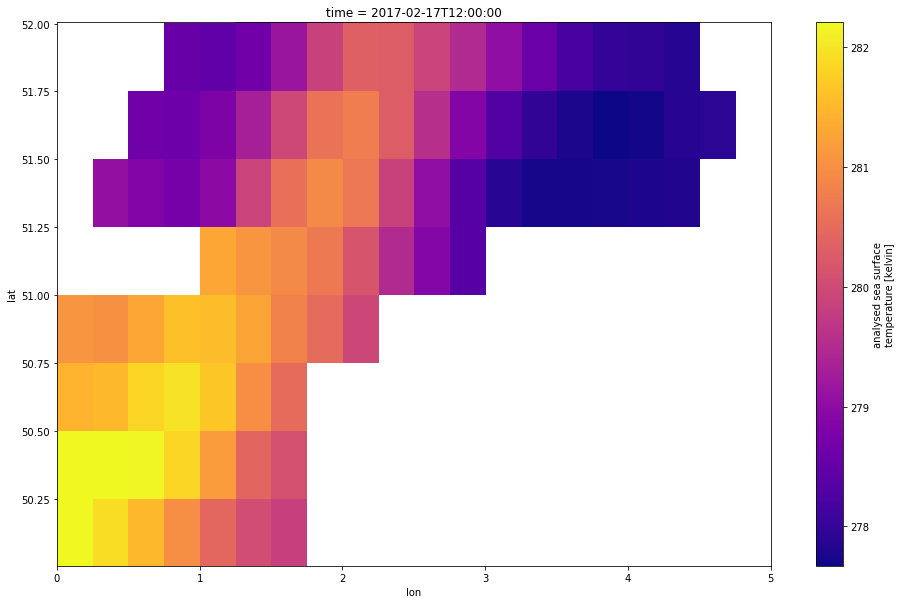

In [12]:
subset_cube.analysed_sst.isel(time=47).plot.imshow(figsize=(16,10), cmap='plasma')

The subset cube can be saved locally with:

In [13]:
# subset_cube.to_zarr('subset_cube_output_path.zarr')